In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
df_raw = pd.read_csv('C:\\Users\\SEOJIN\\Desktop\\jongp1_2021\\train_machinelearning\\train data\\text\\entire.csv', engine='python')
df_raw.head()

,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY,emotion
0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
1,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
4,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p


In [4]:
df_raw_y = df_raw['emotion']
df_raw_x = df_raw.drop('emotion', axis=1, inplace=False)

In [5]:
# data 7:3 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('Train Data X size: {}'.format(df_train_x.shape))
print('Train Data Y size: {}'.format(df_train_y.shape))
print('Test Data X size: {}'.format(df_test_x.shape))
print('Test Data Y size: {}'.format(df_test_y.shape))

Train Data X size: (273, 8)
Train Data Y size: (273,)
Test Data X size: (118, 8)
Test Data Y size: (118,)


In [6]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robust_df_train_x = robustScaler.fit_transform(df_train_x)
robust_df_test_x = robustScaler.transform(df_test_x)

import copy

df_train_x = copy.deepcopy(robust_df_train_x)
df_test_x = copy.deepcopy(robust_df_test_x)

In [7]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.875
Accuracy on test set:0.492


In [8]:
# learning rate에 민감함. 순차적.

In [9]:
#learning rate

train_accuracy = []; test_accuracy=[]

para_lr = [lr*0.01 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [10]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.795,0.644
1,0.02,0.810,0.619
2,0.03,0.817,0.610
3,0.04,0.821,0.593
4,0.05,0.846,0.551
5,0.06,0.857,0.534
6,0.07,0.875,0.508
7,0.08,0.872,0.492
8,0.09,0.872,0.492


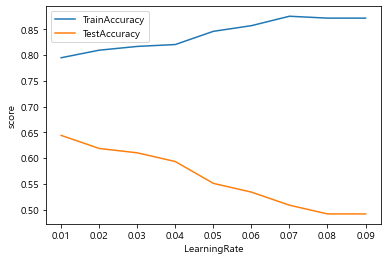

In [11]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_lr, test_accuracy, linestyle='-', label='TestAccuracy')
plt.ylabel('score');plt.xlabel('LearningRate')
plt.legend()

In [12]:
# n-estimator 

train_accuracy = []; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,20)] 

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.01, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [13]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.656,0.517
1,20,0.689,0.534
2,30,0.711,0.542
3,40,0.780,0.602
4,50,0.780,0.602
5,60,0.784,0.602
6,70,0.791,0.636
7,80,0.791,0.653
8,90,0.791,0.653
9,100,0.795,0.644


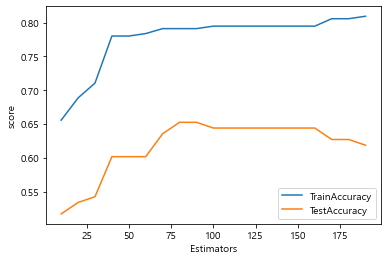

In [14]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='-', label='TestAccuracy')
plt.ylabel('score');plt.xlabel('Estimators')
plt.legend()

In [15]:
# depth 조정
train_accuracy = []; test_accuracy=[]

para_depth = [depth for depth in range(1,10)] # 개수는 그냥 마음대로?

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators=80, learning_rate=0.01, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [16]:
# 위의 모델의 성능 확인
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.733,0.661
1,2,0.780,0.653
2,3,0.791,0.653
3,4,0.806,0.627
4,5,0.821,0.619
5,6,0.832,0.593
6,7,0.853,0.508
7,8,0.868,0.475
8,9,0.872,0.475


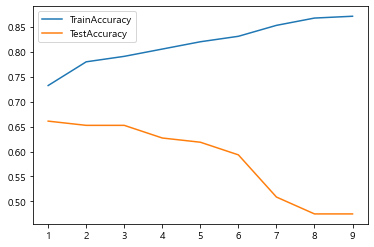

In [17]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_depth, test_accuracy, linestyle='-', label='TestAccuracy')
plt.legend()

In [18]:
# branch 조정

train_accuracy = []; test_accuracy=[]

para_split = [n_split*5 for n_split in range(20,40)] # 개수는 그냥 마음대로?

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth=3, n_estimators=80, learning_rate=0.01, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainScore'] = train_accuracy
df_accuracy_split['TestScore'] = test_accuracy

In [19]:
# 위의 모델의 성능 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,100,0.788,0.653
1,105,0.788,0.653
2,110,0.788,0.653
3,115,0.780,0.653
4,120,0.780,0.653
5,125,0.780,0.653
6,130,0.780,0.636
7,135,0.780,0.636
8,140,0.780,0.636
9,145,0.780,0.636


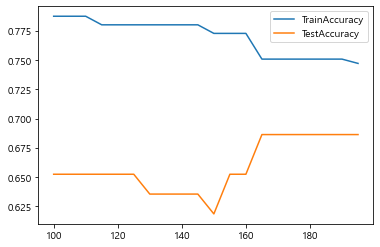

In [20]:
plt.plot(para_split, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_split, test_accuracy, linestyle='-', label='TestAccuracy')
plt.legend()

In [21]:
# leaf 노드 데이터 수 조정 
# leaf 노드가 가지는 데이터 수가 많아지면 과대적합 방지됨

train_accuracy = []; test_accuracy=[]

para_leaf = [n_leaf*5 for n_leaf in range(10,20)] # 개수는 그냥 마음대로? # 확인하고 싶은 만큼 보는거래

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=1234, max_depth=3, n_estimators=80, min_samples_split=165, learning_rate=0.01, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainScore'] = train_accuracy
df_accuracy_leaf['TestScore'] = test_accuracy

In [22]:
# 위의 모델의 성능 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,50,0.722,0.636
1,55,0.722,0.627
2,60,0.722,0.627
3,65,0.722,0.653
4,70,0.718,0.678
5,75,0.711,0.678
6,80,0.692,0.653
7,85,0.700,0.661
8,90,0.656,0.593
9,95,0.648,0.585


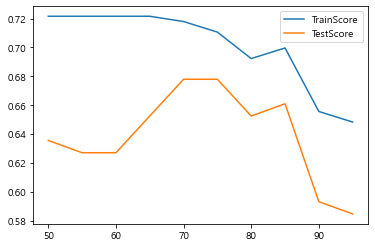

In [23]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_accuracy, linestyle='-', label='TestScore')
plt.legend()

In [24]:
# 모델 선정
gb_final = GradientBoostingClassifier(random_state=1234, max_depth=3, n_estimators=80, min_samples_split=165, learning_rate=0.01, min_samples_leaf=70)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=70,
                           min_samples_split=165, n_estimators=80,
                           random_state=1234)

In [25]:
y_pred = gb_final.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(gb_final.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.678

Confusion Matrix: 
[[28  0 13]
 [ 3 25  7]
 [15  0 27]]


### gridsearchcv

In [26]:
para_leaf = [n_leaf*2 for n_leaf in range(1,100)]
para_split = [n_split*5 for n_split in range(1,80)] 
para_depth = [depth for depth in range(1,10)] 

In [27]:
estimator = GradientBoostingClassifier(learning_rate=0.01, max_depth=2,min_samples_split=70, random_state=1234)
param_grid = {'min_samples_split': para_split}
# param_grid = {'max_depth':para_depth}
grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy',n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print('best estimator model:\n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
print('\nbest score:\n{}'.format(grid_gb.best_score_.round(3)))

best estimator model:
GradientBoostingClassifier(learning_rate=0.01, max_depth=2,
                           min_samples_split=70, random_state=1234)

best parameter:
{'min_samples_split': 70}

best score:
0.743


In [28]:
y_pred = grid_gb.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(grid_gb.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.653

Confusion Matrix: 
[[27  0 14]
 [ 1 24 10]
 [16  0 26]]


- gridsearch로는 learning rate = 0.01, max_depth=2. min_samples_split=70 최대,,인듯?

In [30]:
# 최빈값 찾기
from collections import Counter

def modefinder(numbers):
    c = Counter(numbers)
    order = c.most_common()
    maximum = order[0][1]

    modes = []
    for num in order:
        if num[1] == maximum:
            modes.append(num[0])
    return modes

# data = ['1_'+str(i) for i in range(1,9)]
# data

for j in range(1,7):
    data = [str(j)+'-'+str(i) for i in range(1,9)]
    print(data)
    p_cnt = 0; z_cnt=0; n_cnt=0;
    for i in data:
        df_test = pd.read_csv('C:\\Users\\SEOJIN\\Desktop\\jongp1_2021\\train_machinelearning\\test data\\'+i+'.csv')
    #     print(df_test)
        robustScaler = RobustScaler()
        r_df_test = robustScaler.fit_transform(df_test)   
#         print(r_df_test)
        
        y_pred = gb_final.predict(r_df_test)
        df_test['emotion_pred'] = y_pred
    #     print(df_test)

        a = modefinder(y_pred)
        if a == ['p']:
            p_cnt += 1
        elif a == ['z']:
            z_cnt += 1
        elif a == ['n']:
            n_cnt += 1

    print(str(j)+': positive is '+str(p_cnt)+', normal is '+str(z_cnt)+', negative is '+str(n_cnt))


['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8']
1: positive is 0, normal is 1, negative is 7
['2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '2-8']
2: positive is 0, normal is 0, negative is 7
['3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7', '3-8']
3: positive is 0, normal is 1, negative is 7
['4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '4-8']
4: positive is 0, normal is 0, negative is 8
['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8']
5: positive is 0, normal is 5, negative is 3
['6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8']
6: positive is 0, normal is 6, negative is 2
